<a href="https://colab.research.google.com/github/lgvaz/faststyle/blob/master/examples/eval_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Get more ram
# import numpy as np
# _ = np.ones((1000,1000,1000,1000))

In [0]:
try:
  import fastai2
except ImportError:
  !pip install -q git+git://github.com/fastai/fastcore.git
  !pip install -q git+git://github.com/fastai/fastai2.git
  !pip install -q git+https://github.com/lgvaz/faststyle.git

In [0]:
from fastai2.basics import *
from fastai2.vision.all import *
from faststyle import *

In [4]:
try:
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)
  root_dir = Path('/content/gdrive/My Drive/')
except ImportError:
  root_dir = Path('.')
save_dir = root_dir/'dl/faststyle'

Mounted at /content/gdrive


In [0]:
mname = 'abstract_digital1_1024_2'
learn = load_learner(root_dir/f'dl/faststyle/exports/{mname}.pkl')

In [0]:
imgs_dir = Path('imgs')
save_dir = save_dir/Path('preds')/mname; save_dir.mkdir(exist_ok=True)
fns = get_image_files(imgs_dir)
# fns = L(fns).map(lambda o: imgs_dir/o)

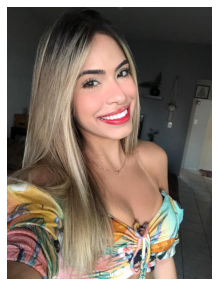

In [7]:
dset = Datasets(fns, tfms=[[PILImageX.create], [PILImage.create]])
show_at(dset, 0)

In [0]:
after_item = Pipeline([RatioResize(1024), ToTensor()])
after_batch = Pipeline(L(list(learn.dls.after_item)).filter(lambda o: not isinstance(o, RandTransform)))

In [9]:
with torch.no_grad():
  for item,fn in zip(dset,fns):
    dl = learn.dls.valid.new([item], after_item=after_item, bs=1)
    _,_,preds = learn.get_preds(dl=dl, with_decoded=True)
    img = PILImage.create(TensorImage((preds[0]*255).long()))
    img.save(save_dir/fn.name)